___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Polynomial Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Everything BUT the sales column
X = df.drop('sales',axis=1)

In [6]:
y = df['sales']

## SciKit Learn 

---

## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [15]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [16]:
230.1*37.8

8697.779999999999

In [17]:
230.1*69.2

15922.92

In [18]:
37.8*69.2

2615.7599999999998

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model for fitting on Polynomial Data

#### Create an instance of the model with parameters

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(fit_intercept=True)

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [24]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


-----

## Evaluation on the Test Set

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [25]:
test_predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [28]:
MAE

0.489679804480361

In [29]:
MSE

0.4417505510403426

In [30]:
RMSE

0.6646431757269028

In [31]:
df['sales'].mean()

14.022500000000003

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

---
---
## Choosing a Model

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [32]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

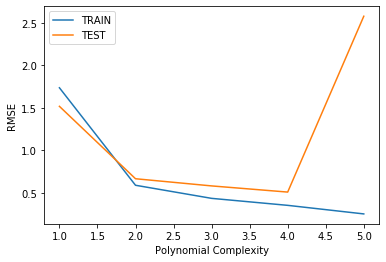

In [33]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

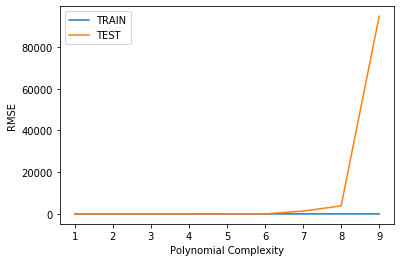

In [34]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

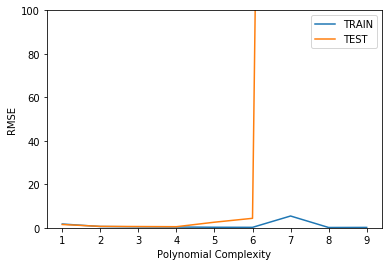

In [35]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [42]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [43]:
final_model = LinearRegression()

In [45]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Saving Model and Converter

In [46]:
from joblib import dump, load

In [49]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [50]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [62]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [63]:
campaign = [[149,22,12]]

In [64]:
campaign_poly = loaded_poly.transform(campaign)

In [65]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [67]:
final_model.predict(campaign_poly)

array([14.64501014])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X=df.drop("sales", axis=1)

In [6]:
y=df["sales"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [15]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [29]:
# create new featureset to give more signal for linear regression
poly_features=polynomial_converter.transform(X)

In [30]:
X.shape

(200, 3)

In [31]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [32]:
poly_features.shape

(200, 9)

In [33]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [34]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [35]:
230.1*69.2

15922.92

In [36]:
poly_features=polynomial_converter.fit_transform(X)

In [39]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model=LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
prediction=model.predict(X_test)

In [62]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(y_test, prediction)

0.4896798044803488

In [54]:
mean_squared_error(y_test, prediction)

0.44175055104033534

In [59]:
root_mean_squared_error=np.sqrt(mean_squared_error(y_test, prediction))

In [60]:
root_mean_squared_error

0.6646431757268974

In [61]:
# as our model is train on 9 features and when we use our model, we give real world dataset and give 3 features so, later on when we save model, we also 
# need to save polynomial_converter we created so, we dont have to provide extra 6 data by manually calculating

In [65]:
# better then previous linear regression model. for fare comparision have same test train size ratio and random state here 101=grabs same index rows for both model

In [66]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [67]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [68]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [93]:
# looking for choosing degree complexity/ bias variance tradeoff/ underfitting(high bias) overfitting(high variance)
# need to choose optimal model complexity(in this case order of the polynomial)
train_rmse=[]
test_rmse=[]
for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_predict)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_predict)))

In [94]:
train_rmse

[1.7376515982447711,
 0.5947926597019146,
 0.4405973423236363,
 0.3532913282038105,
 0.24845372701424193,
 0.18834333539645629,
 4.728729737463754,
 0.15359696665165296,
 0.15139930335280652]

In [95]:
test_rmse

[1.532440942651242,
 0.6482912032533645,
 0.5577254823372871,
 0.5064297307320542,
 2.3573563710197067,
 11.203936289480467,
 1176.3898053285477,
 3311.970068704498,
 142167.90873852617]

Text(0, 0.5, 'RMSE')

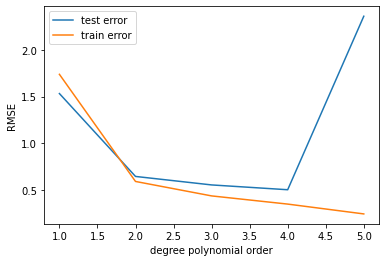

In [100]:
plt.plot(range(1,6), test_rmse[:5], label="test error")
plt.plot(range(1,6), train_rmse[:5], label="train error")
plt.legend()
plt.xlabel("degree polynomial order")
plt.ylabel("RMSE")
# visually see where we spike in test data and decline in train error for optimal polynomial degree

Text(0, 0.5, 'RMSE')

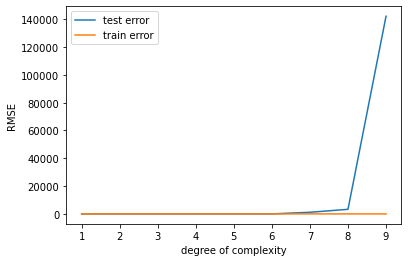

In [101]:
plt.plot(range(1,10), test_rmse[:9], label="test error")
plt.plot(range(1,10), train_rmse[:9], label="train error")
plt.legend()
plt.xlabel("degree of complexity")
plt.ylabel("RMSE")

In [104]:
# overfit from 4 to 9
# more and more fit to train data with low error in train data and spiking in error for test data
# train error going more and more towards 0 as you picking every single pice of noise and variance in that dataset.

In [105]:
# should i choose degree 3 or 4. even 4 seems better then 3, choose 3 because it depends on domain knowledge too fro interaction term with 4 vs 3 having only 3 features dont make sense 
# and choose 2 or 3 + 4 is region of risk to explode error too.

In [109]:
# we choose degree=3
# you need to save poly converter too
# as it is final model no need to split train on whole data as we have choose better hyper parameter degree and performance metrics RMSE is best

In [111]:
final_poly_converer=PolynomialFeatures(degree=3, include_bias=False)
final_poly_features=final_poly_converer.fit_transform(X)

In [112]:
final_model=LinearRegression()

In [113]:
final_model.fit(final_poly_features, y)

LinearRegression()

In [114]:
# now model is created, now save for future use
from joblib import load, dump

In [115]:
dump(final_poly_converer,"final_poly_converer.joblib")
dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [116]:
loaded_poly_converer=load("final_poly_converer.joblib")
loaded_poly_model=load("final_poly_model.joblib")

In [117]:
# we have new data for which we need to predict sells unit
data_x=[[120,110,34]]

In [118]:
loaded_poly_converer_features=loaded_poly_converer.fit_transform(data_x)

In [119]:
loaded_poly_converer_features

array([[1.2000e+02, 1.1000e+02, 3.4000e+01, 1.4400e+04, 1.3200e+04,
        4.0800e+03, 1.2100e+04, 3.7400e+03, 1.1560e+03, 1.7280e+06,
        1.5840e+06, 4.8960e+05, 1.4520e+06, 4.4880e+05, 1.3872e+05,
        1.3310e+06, 4.1140e+05, 1.2716e+05, 3.9304e+04]])

In [120]:
loaded_poly_converer_features.shape

(1, 19)

In [122]:
predicted_outcome=loaded_poly_model.predict(loaded_poly_converer_features)

In [123]:
predicted_outcome

array([30.90210732])